In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [17]:
# Cargar los datos
data = pd.read_csv("GOOG.csv")
data = pd.DataFrame(data)
data = data[['close']]  # Utilizando sólo precios de cierre

# Limpieza de datos
imputer = SimpleImputer(strategy='mean')
data[['close']] = imputer.fit_transform(data[['close']])

In [4]:
timesteps = 60  # Número de días pasados ​​utilizados para la predicción


# Crear secuencias de temporales, datos para el entrenamiento
def create_sequences(data, timesteps):
    X, y = [], []
    for i in range(timesteps, len(data)):
        X.append(data[i-timesteps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [5]:
# Escalado de datos
scaler = MinMaxScaler(feature_range=(0, 1))    ###transforma los datos en ceros y uno
data_scaled = scaler.fit_transform(data.values)

In [6]:
# División de datos en conjuntos de entrenamiento y prueba
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size - timesteps:]

X_train, y_train = create_sequences(train_data, timesteps)
X_test, y_test = create_sequences(test_data, timesteps)

In [7]:
# Reshaping para LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
#modelo 1 LSTM

model1 = Sequential([
    LSTM(50, return_sequences=True, input_shape=(timesteps, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#modelo 2 LSTM (con mas capas)

model2 = Sequential([
    LSTM(100, return_sequences=True, input_shape=(timesteps, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50),
    Dense(1)
])

model2.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,701 (807.43 KB)

 Trainable params: 206,701 (807.43 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
epochs = 50
batch_size = 32

# Entrenar el modelo 1
history1 = model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                      verbose=1, validation_data=(X_test, y_test))

# Entrenar el modelo 2
history2 = model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                      verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0123 - mae: 0.0856 - val_loss: 0.0137 - val_mae: 0.1014
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - mae: 0.0271 - val_loss: 0.0013 - val_mae: 0.0288
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012 - mae: 0.0253 - val_loss: 0.0015 - val_mae: 0.0299
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.1736e-04 - mae: 0.0214 - val_loss: 0.0015 - val_mae: 0.0305
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.4439e-04 - mae: 0.0207 - val_loss: 0.0025 - val_mae: 0.0398
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.1353e-04 - mae: 0.0184 - val_loss: 0.0040 - val_mae: 0.0530
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.2856e-04 - mae: 0.0200 - val_loss: 0.0013 - val_mae: 0.0281
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.5489e-04 - mae: 0.0189 - val_loss: 0.0036 - val_mae: 0.0503
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19m

In [13]:
#Predicciones

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [14]:
# Revertir Scaling

y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred1_actual = scaler.inverse_transform(y_pred1)
y_pred2_actual = scaler.inverse_transform(y_pred2)

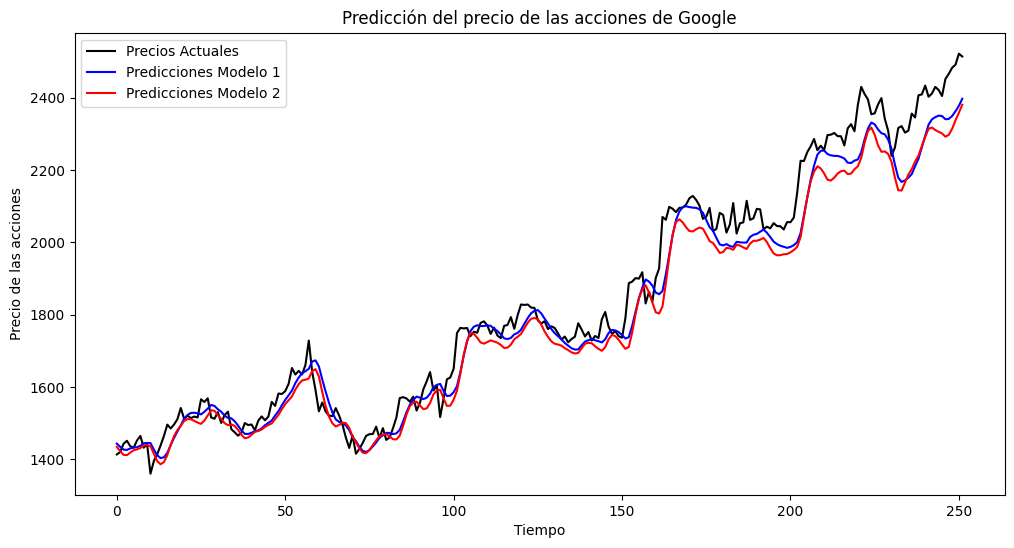

In [16]:
# Graficar

plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Precios Actuales', color='black')
plt.plot(y_pred1_actual, label='Predicciones Modelo 1', color='blue')
plt.plot(y_pred2_actual, label='Predicciones Modelo 2', color='red')
plt.legend()
plt.title("Predicción del precio de las acciones de Google")
plt.xlabel("Tiempo")
plt.ylabel("Precio de las acciones")
plt.show()